# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [61]:
#Checking the number of mice.
mouse_groups = study_data_complete.groupby('Mouse ID')
len(mouse_groups['Mouse ID'].unique())

249

In [62]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete[study_data_complete.duplicated()]
duplicate_ID = duplicate_mice['Mouse ID'].to_numpy()
duplicate_ID

array(['g989'], dtype=object)

In [63]:
# Collect all rows from the dataframe that match any of the IDs in the duplicates array. 
# This code can adjust if another duplicate were to be found later.
study_data_complete.loc[study_data_complete["Mouse ID"].isin(duplicate_ID),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_complete = study_data_complete.loc[~study_data_complete['Mouse ID'].isin(duplicate_ID),:]
study_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [65]:
# Checking the number of mice in the clean DataFrame.
len(study_data_complete['Mouse ID'].unique())

248

## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
study_data_mean = study_data_complete.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
study_data_med = study_data_complete.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
study_data_var = study_data_complete.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
study_data_std = study_data_complete.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
study_data_sem = study_data_complete.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]
# Assemble the resulting series into a single summary DataFrame.
data = {"Mean Tumor Volume":study_data_mean, "Median Tumor Volume":study_data_med, "Tumor Volume Variance":study_data_var,
        "Tumor Volume Std. Dev.": study_data_std, "Tumor Volume Std. Err.":study_data_sem}
study_summary = pd.DataFrame(data)
study_summary.head(15)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Trials')

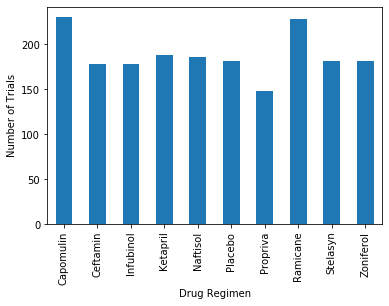

In [73]:
#Create a new dataframe with the drugs listed once and the counts for each
bar_df = study_data_complete.groupby(["Drug Regimen"]).count()
bar_df = bar_df["Mouse ID"]

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_df.plot(kind="bar", legend = False).set_ylabel("Number of Trials")

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for 
# each drug regimen using pyplot.

#Create a new dataframe with the drugs listed once and the counts for each
bar_df = study_data_complete.groupby(["Drug Regimen"]).count().reset_index()

#Label the x and y axes from the new data frame, mouse ID now contains the counts of mice.
x_axis = bar_df["Drug Regimen"]
y_axis = bar_df["Mouse ID"]

#Generate a bar graph.
plt.bar(x_axis,y_axis)
plt.xticks(rotation = "vertical")
plt.title("Number of Trials per Drug", loc = "center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Trials")

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
bar_df.plot.bar("Drug Regimen","Mouse ID", legend = False).set_ylabel("Number of Trials")


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

